# Project: Wrangling and preparing data set for analyzing
## DS: Movies Metadata

#### Context

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

#### Goal

This midterm project's primary goal is to __clean and prepare data set for analysis in Tableau.__
The final data should be clean and have all the necessary information to answer the main question:
_"What are the main features differences between the top 100 movies from other remaining profitable movies released between 2000 and 2017, with a minimum profit of 40%?'_

__The project consists of the steps listed below:__
- 1: Gathering data
- 2: Assessing data
- 3: Cleaning data
- 4: Storing data


In [609]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import ast
import seaborn as sns
import matplotlib.pyplot as plt


In [610]:
# Setting the plotting theme
sns.set()
sns.set_theme(style="darkgrid")

# and setting the size of all plots
plt.rcParams['figure.figsize'] = 15, 5

# and setting the colors
color = ["#4b85a8", "#d98100", "#aba597"]



## Data Gathering

__In the cell below, gather a piece of data for this project and load them into the notebook.__

- Directly download the Movies MetaData (movies_metadata.csv)


In [611]:
# Read in the csv file
movies = pd.read_csv("movies_metadata.csv")


/Users/kristina/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [612]:
# Inspect data
movies.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,26162,tt0020668,en,The Bat Whispers,A master criminal terrorizes the occupants of ...,...,1/1/30,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Bat Whispers,False,6.3,4.0
1,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,56178,tt0021273,fr,Prix de beautթ,"Lucienne, typist and gorgeous bathing beauty, ...",...,1/1/30,0.0,93.0,"[{'iso_639_1': 'fr', 'name': 'Fran�_ais'}]",Released,NaN,Beauty Prize,False,0.0,1.0
2,False,NaN,0,[],NaN,195617,tt0021004,en,It's a Bird,"Charlie, working on a junkjard, always trying ...",...,1/1/30,0.0,14.0,[],Released,NaN,It's a Bird,False,8.0,2.0
3,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...",NaN,54419,tt0021409,fr,Sous les toits de Paris,Albert is smitten for Pola but ends up wrongly...,...,1/2/30,0.0,96.0,"[{'iso_639_1': 'fr', 'name': 'Fran�_ais'}, {'i...",Rumored,NaN,Under the Roofs of Paris,False,6.2,9.0
4,False,"{'id': 281097, 'name': 'Philo Vance Collection...",0,"[{'id': 9648, 'name': 'Mystery'}]",NaN,61546,tt0020695,en,The Bishop Murder Case,The murders start with the body of Robin. He i...,...,1/3/30,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,ALL-TALKING!...ALL-THRILLS!,The Bishop Murder Case,False,3.6,4.0


## Assessing Data

In [613]:
# Print data information
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [614]:
# Print stat summary
movies.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921443,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005427,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.390000,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.130000,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.680000,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.490000,2.787965e+09,1256.000000,10.000000,14075.000000


In [615]:
# Print shape of data set 
movies.shape


(45463, 24)

In [616]:
# Print movies columns 
movies.columns


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### Quality issues

#### df: movies


- The column "budget" contains the string object.
- The column "budget" has an object data type.
- The column "popularity" has an object data type.
- The column "revenue" has a float data type.
- The column "release_date" has an object data type.
- Redundant columns not relevant to the problem statement.
- The columns "budget" and "revenue" contain 0s.
- The columns "budget" and "revenue" contain extremely small values.


### Tidiness issues
#### df: movies

- There is no "profit" column.
- There is no "profit_ratio" column.
- The "genre" column should have one primary genre.
- The "production_companies" column should have one company name.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [617]:
# Make copie of the original piece of data
movies_df = movies.copy()


### Issue: Redundant columns not relevant to the problem statement.
#### Define: The columns  'adult', 'belongs_to_collection','homepage', 'id', 'imdb_id', 'overview','poster_path', 'production_countries','spoken_languages', 'tagline', 'title', 'video' contain unnecessary information, drop them.  
#### Code

In [618]:
# Drop columns
drop_col = ['adult', 'belongs_to_collection','homepage', 'id',
            'imdb_id', 'overview','poster_path','production_countries',
            'spoken_languages', 'tagline', 'original_title', 'video', 'original_language']

movies_df = movies_df.drop(drop_col, axis = 1)


#### Test

In [619]:
movies_df.head(3)

,budget,genres,popularity,production_companies,release_date,revenue,runtime,status,title,vote_average,vote_count
0,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",0.67,"[{'name': 'Joseph M. Schenck Productions', 'id...",1/1/30,0.0,83.0,Released,The Bat Whispers,6.3,4.0
1,0,"[{'id': 18, 'name': 'Drama'}]",0.44,[],1/1/30,0.0,93.0,Released,Beauty Prize,0.0,1.0
2,0,[],0.11,[],1/1/30,0.0,14.0,Released,It's a Bird,8.0,2.0


______

### Issue: The column "budget" has an object data type.
#### Define: The column "budget" have to be in int format.
#### Code

In [620]:
# Convert 'budget' into int
movies_df['budget'] = movies_df['budget'].astype("int64")


#### Test

In [621]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45463 non-null  int64  
 1   genres                45463 non-null  object 
 2   popularity            45460 non-null  float64
 3   production_companies  45460 non-null  object 
 4   release_date          45376 non-null  object 
 5   revenue               45460 non-null  float64
 6   runtime               45203 non-null  float64
 7   status                45379 non-null  object 
 8   title                 45460 non-null  object 
 9   vote_average          45460 non-null  float64
 10  vote_count            45460 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.8+ MB


### Issue: The column "popularity" contains  string object
#### Define: Drop string
#### Code

In [622]:
movies_df = movies_df[pd.to_numeric(movies_df['popularity'], errors='coerce').notnull()]


In [623]:
print(movies_df[movies_df['popularity'].isnull()])

Empty DataFrame
Columns: [budget, genres, popularity, production_companies, release_date, revenue, runtime, status, title, vote_average, vote_count]
Index: []


### Issue: The column "popularity" has an object data type.
#### Define: The column "popularity" have to be in float format.
#### Code

In [624]:
# Convert 'popularity' into float
movies_df['popularity'] = movies_df['popularity'].astype("float")


#### Test

In [625]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45462
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45460 non-null  int64  
 1   genres                45460 non-null  object 
 2   popularity            45460 non-null  float64
 3   production_companies  45460 non-null  object 
 4   release_date          45376 non-null  object 
 5   revenue               45460 non-null  float64
 6   runtime               45203 non-null  float64
 7   status                45379 non-null  object 
 8   title                 45460 non-null  object 
 9   vote_average          45460 non-null  float64
 10  vote_count            45460 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.2+ MB


### Issue: The column "release_date" has an object data type
#### Define:  Date and time data have to be in DateTime format
#### Code

In [626]:
# Convert 'release_date' to a date-time
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])


#### Test

In [627]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45462
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45460 non-null  int64         
 1   genres                45460 non-null  object        
 2   popularity            45460 non-null  float64       
 3   production_companies  45460 non-null  object        
 4   release_date          45376 non-null  datetime64[ns]
 5   revenue               45460 non-null  float64       
 6   runtime               45203 non-null  float64       
 7   status                45379 non-null  object        
 8   title                 45460 non-null  object        
 9   vote_average          45460 non-null  float64       
 10  vote_count            45460 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 4.2+ MB


___________

### Issue: The "genre" column should have one primary genre.
#### Define:  The "genre" column has a multiple genres 
#### Code


In [628]:
# Extract genres information
movies_df['genres'] = movies_df['genres'].fillna('[]')\
                      .apply(ast.literal_eval)\
                      .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
        

In [629]:
# Create the main genre column
movies_df["main_genre"] = movies_df["genres"].map(lambda x: x[0] if len(x)>0 else "None")


#### Test

In [630]:
movies_df.main_genre.head(2)

0    Crime
1    Drama
Name: main_genre, dtype: object

________

### Issue: The "production_companies" column should have one company name.
#### Define:  The "production_companies"  column has a multiple companies 
#### Code

In [631]:
# Extract "production_companies" names
movies_df["production_companies"] = movies_df["production_companies"].fillna('[]')\
                      .apply(ast.literal_eval)\
                      .apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])


In [632]:
# Create the main production_companies column
movies_df["main_production_companies"] = movies_df["production_companies"]\
                                         .map(lambda x: x[0] if len(x)>0 else "None")


#### Test

In [633]:
movies_df.main_production_companies.head(2)

0    Joseph M. Schenck Productions
1                             None
Name: main_production_companies, dtype: object

The main genre and production company were extracted in their columns; hence, we don't need columns with multiples values and drop them.

In [634]:
# Drop "genres" and "production_companies" columns
movies_df = movies_df.drop(["genres","production_companies"], axis = 1)


___________

### Issue: The columns "budget" and "revenue" contain 0s
#### Define: Drop all rows with 0s
#### Code

In [635]:
# Shape before dropping
movies_df.shape


(45460, 11)

In [636]:
# Drop all rows with 0s in the "budget" and "revenue"
movies_df = movies_df[(movies_df[["budget","revenue"]] != 0).all(axis=1)]


In [637]:
# Shape after dropping
movies_df.shape


(5381, 11)

____________

### Issue: The columns "budget" and "revenue" contain extremely small values. 
#### Define: Drop all values less than 100 000
#### Code

In [638]:
# Drop rows with budget less than 100 000 
movies_df = movies_df[movies_df.budget >= 100000]


#### Test

In [639]:
movies_df.budget.min()

100000

In [640]:
# Drop revenue rows less than 100 000 
movies_df = movies_df[movies_df.revenue >= 100000]


#### Test

In [641]:
movies_df["revenue"].min()

100000.0

________

### Issue: Released date after July 2017
#### Define: The data set can't have a `release_date` further than __July 2017__, which means all data above that date is compromised and have to be fixed.
#### Code

In [642]:
# Replace the 20s century with 19s for all rows above July 2017 year
movies_df['release_date']=np.where(pd.to_datetime(movies_df['release_date']).dt.year>2017,
                                  (pd.to_datetime(movies_df['release_date']) - pd.DateOffset(years=100)), 
                                   pd.to_datetime(movies_df['release_date']))


#### Test

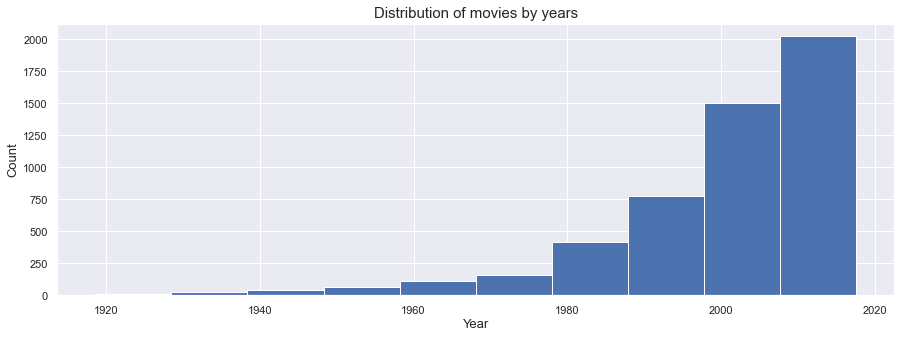

In [643]:
# Plot the data frame
ax = movies_df.release_date.hist()

# Set labels and legend
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Count", fontsize=13)
ax.set_title("Distribution of movies by years", fontsize=15);


_______

### Issue: The data set doesn't have a `profit` and `profit_ratio` features
#### Define: Add a `profit` and `profit_ratio` columns with income and budget calculations
#### Code

In [644]:
# Add "profit" column
movies_df["profit"] = movies_df["revenue"] - movies_df["budget"]


In [645]:
# Add "profit_ratio" column
movies_df["profit_ratio"] = movies_df["profit"] / movies_df["revenue"]


______

### Issue: The `status` column has several status variables.
#### Define: Drop all rows but Released status
#### Code

In [646]:
movies_df = movies_df[movies_df["status"]=="Released"]


In [647]:
# Drop `status` column
movies_df = movies_df.drop(["status"], axis = 1)



____


In [648]:
movies_df = movies_df[['release_date','title','main_genre','main_production_companies','runtime',
                  'budget','revenue','profit', 'profit_ratio',
                  'popularity', 'vote_average', 'vote_count']]

In [649]:
movies_df.shape

(5129, 12)

### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "movies_df_clean.csv"

In [603]:
# Save "movies_df" to a csv file called "movies_df_clean.csv" using the to_csv() method
movies_df.to_csv("movies_df_clean2.csv",index=False)


### Summarize the cleaning process

The data set had __45463 rows and 24 columns__; after cleaning, it is __5129 rows and 12 columns.__

It was a routine cleaning: checking the df information and converting the columns' values into the correct format. But without putting too much time, because Tableau can handle it very well.

All unneeded columns were removed. In the release_date columns, we changed centuries; if the year was after 2017, it was clear that it was the wrong year and had to be changed into 19' century.

Columns genres and production_companies contain multiple variables, which lead to overlapping for this analysis. The first genre and production company were extracted and put into individuals columns. 

The original data set had a "budget" and "revenue" columns but not a profit and profit ratio. 